In [2]:
!rm -r /content/Detecting-Hand-LandMarks-Project/
!git clone https://github.com/MazenFayed/Detecting-Hand-LandMarks-Project.git

Cloning into 'Detecting-Hand-LandMarks-Project'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 17 (delta 4), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (17/17), 13.11 MiB | 20.63 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [3]:
%cd  Detecting-Hand-LandMarks-Project

/content/Detecting-Hand-LandMarks-Project


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils

In [5]:
df = pd.read_csv("hand_landmarks_data.csv")
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [6]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517395,252.115322,-0.009465,202.862981,240.645966,-0.015946,203.025267,...,-0.024129,201.792374,227.455597,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384691,0.010376,80.412089,74.721921,0.013973,79.647588,...,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489950,-0.155846,23.446341,...,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815950,-5.243216e-08,130.535929,197.999625,-0.015199,136.711035,187.018583,-0.023020,138.905817,...,-0.030728,126.828913,172.720392,-0.042726,126.887403,172.345467,-0.041957,126.356627,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979530,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,...,-0.020969,197.579865,221.781479,-0.029942,197.591736,222.381149,-0.028510,197.453270,222.485229,-0.025269
75%,266.428482,304.991663,2.989988e-07,261.147457,296.850769,-0.002783,255.876354,284.925993,-0.007134,254.622768,...,-0.013661,268.103920,273.190765,-0.019987,267.745743,274.196884,-0.017971,267.324657,275.805222,-0.014294
max,633.556020,781.674469,1.876254e-06,606.232386,751.869416,0.076365,598.541348,719.365010,0.094131,607.999801,...,0.031774,632.923029,779.419948,0.078105,638.134761,760.854103,0.104580,641.788521,760.554894,0.118668


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [8]:
df.isna().sum()

,0
x1,0
y1,0
z1,0
x2,0
y2,0
...,...
z20,0
x21,0
y21,0
z21,0


# Data Visualisation

<Axes: xlabel='label', ylabel='count'>

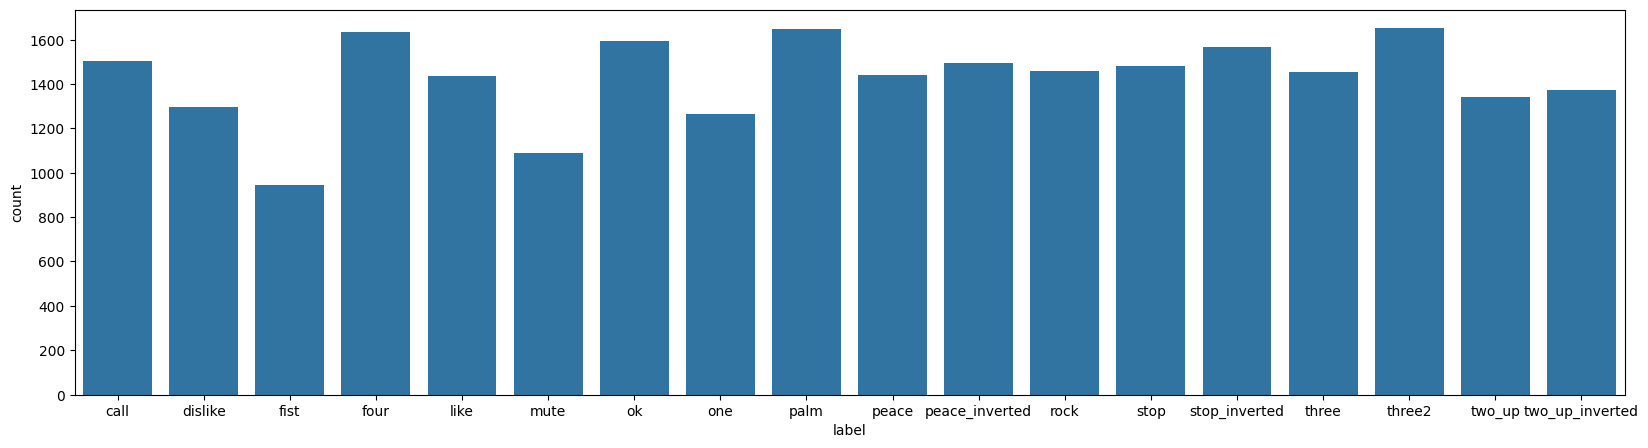

In [9]:
plt.figure(figsize=(20,5))
sns.countplot(data=df,x="label")

#### from countplot the data is splitted well between categories

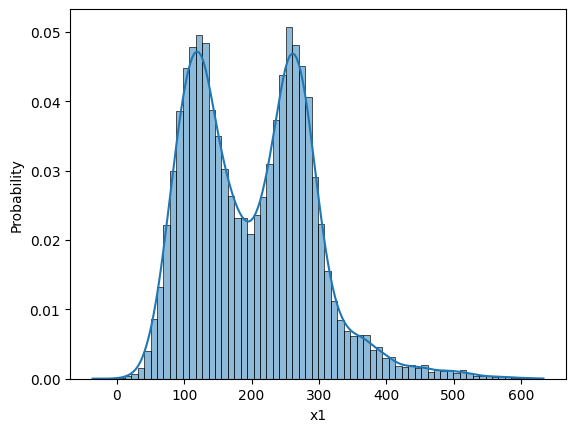

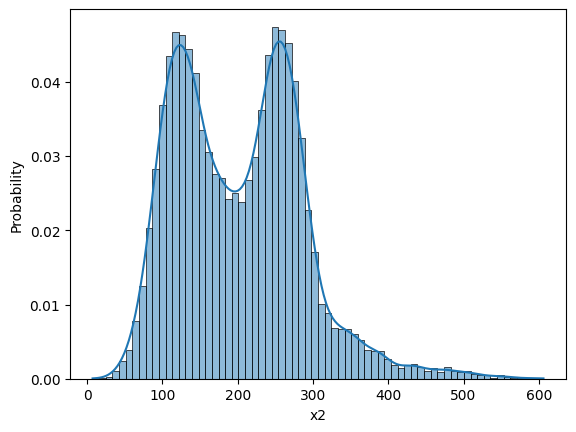

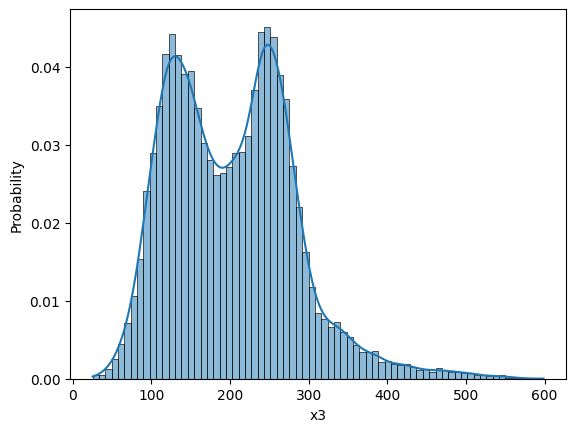

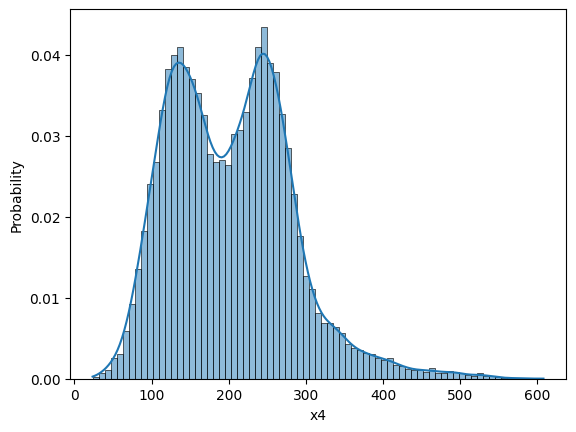

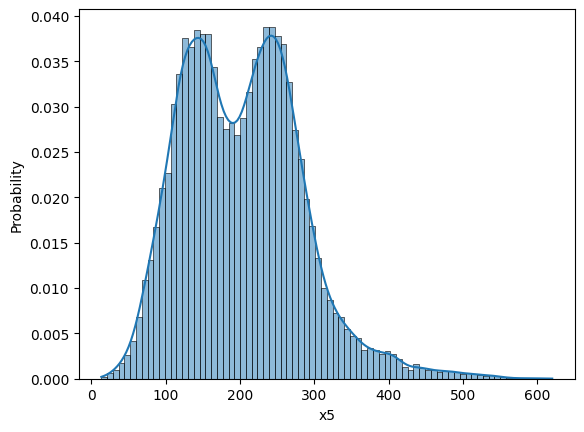

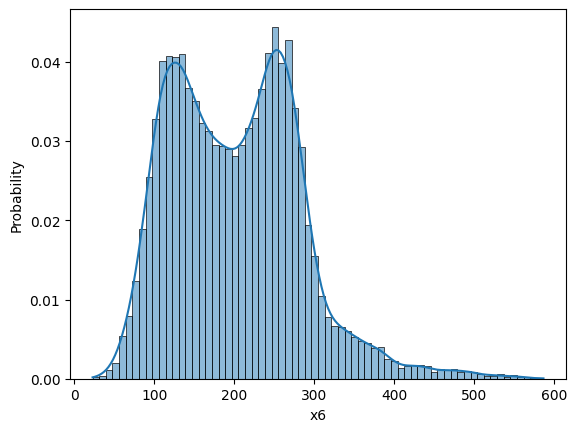

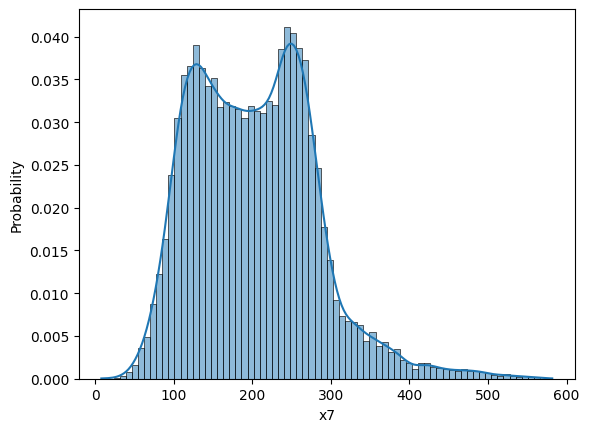

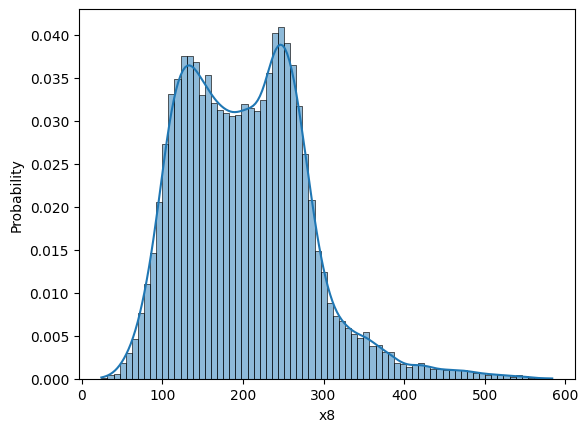

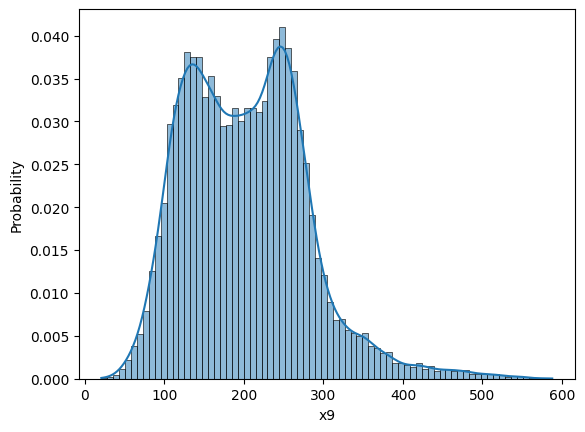

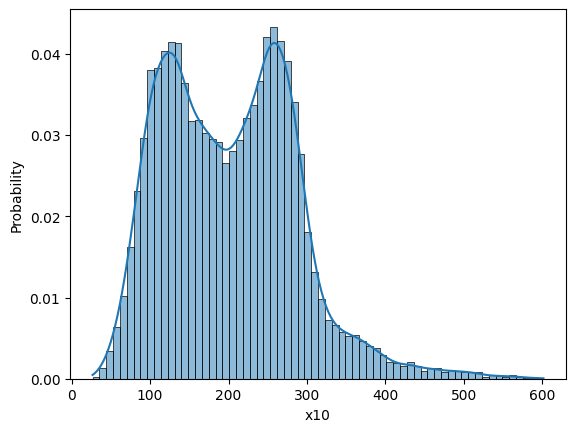

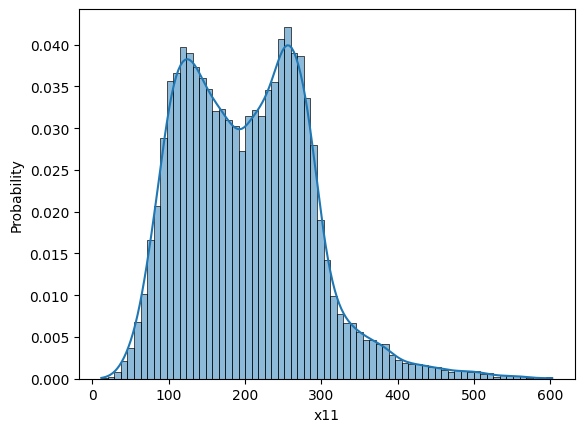

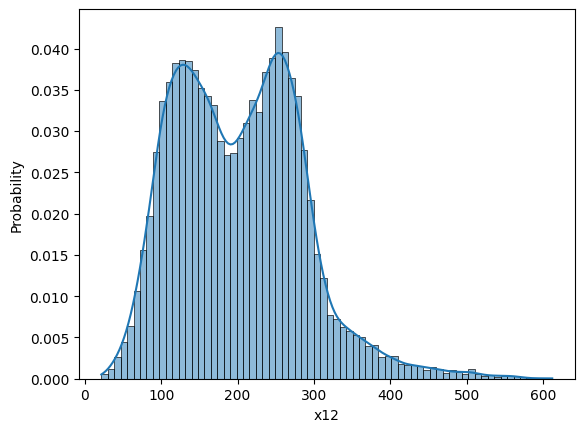

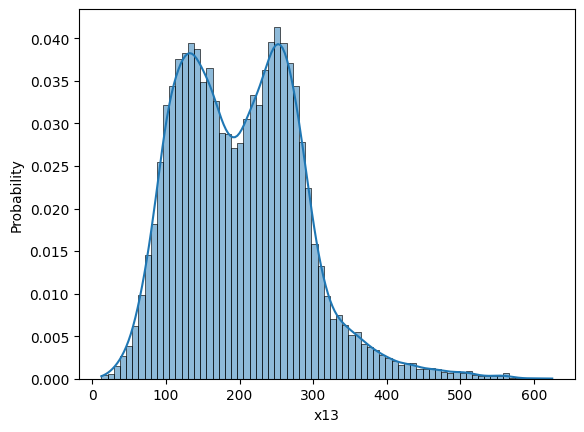

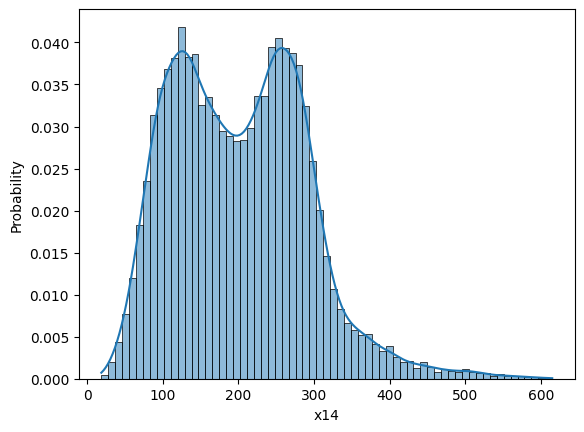

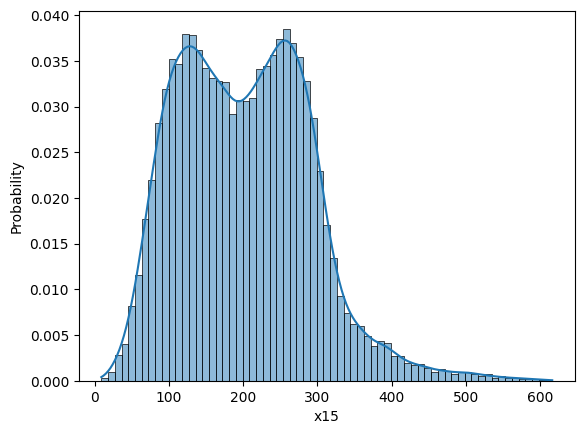

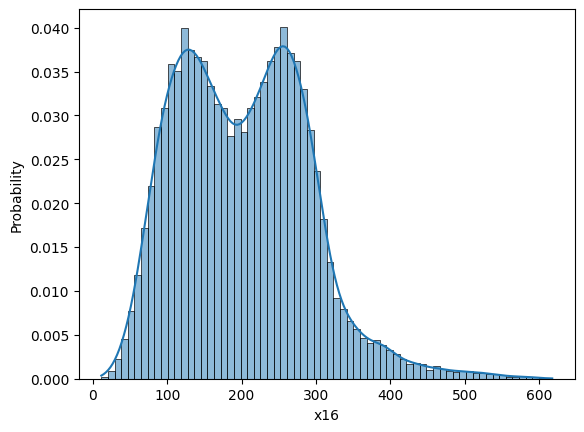

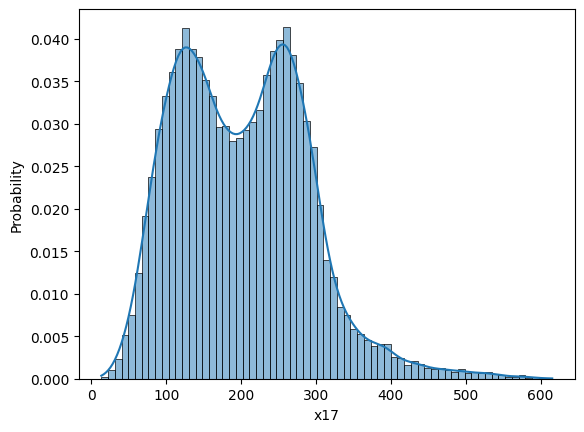

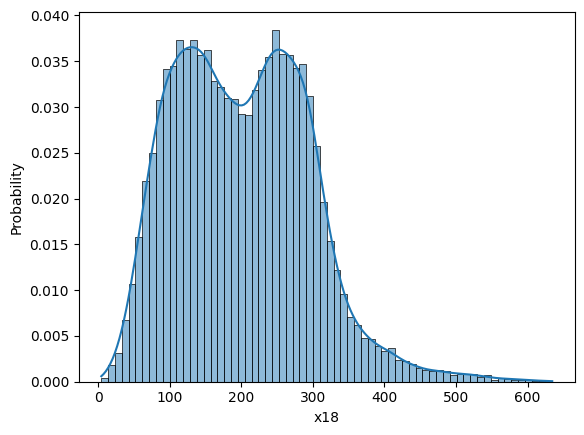

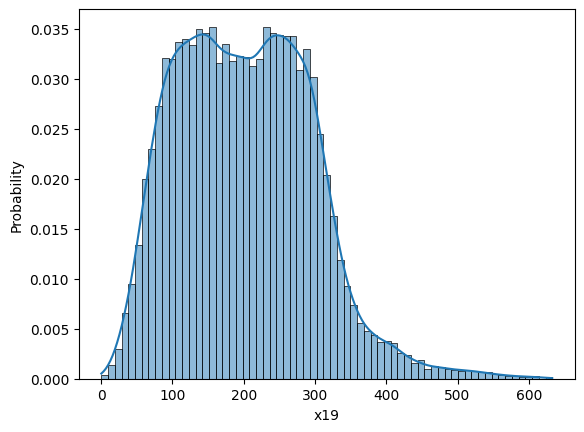

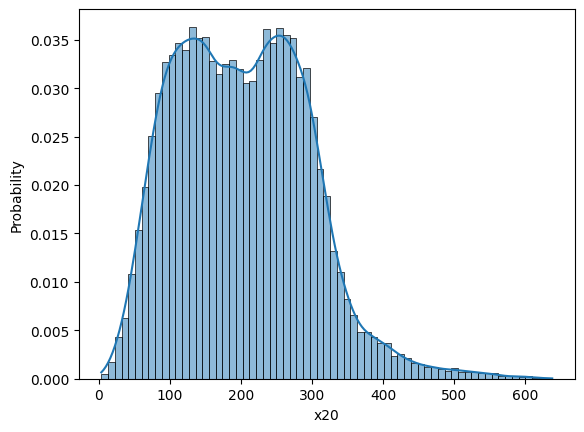

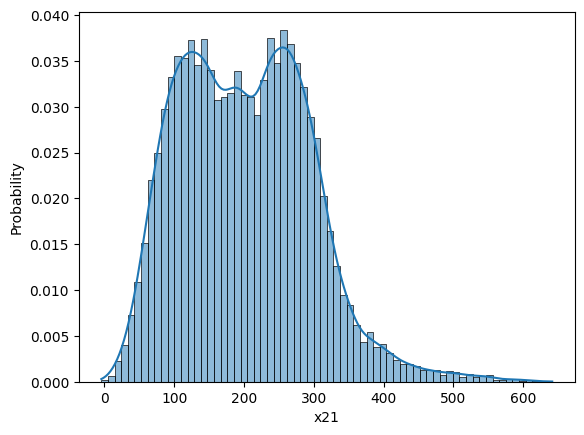

In [37]:
for i in range(1,22):
  sns.histplot(data=df,x=f"x{str(i)}",stat="probability",kde=True)
  plt.show()

#### from histogram the data seems to be right skewed

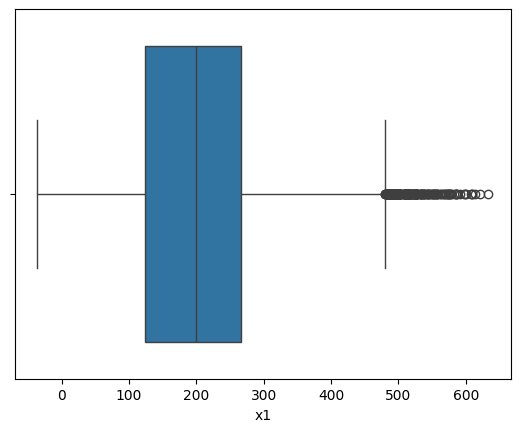

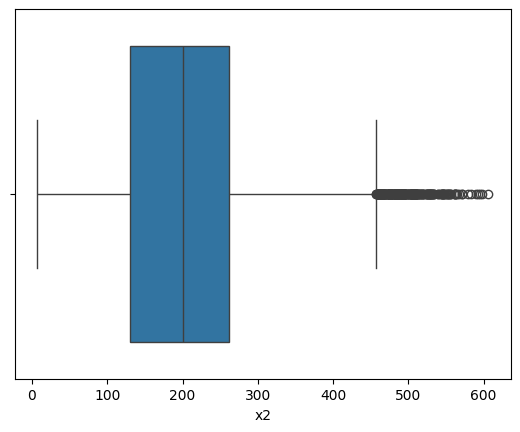

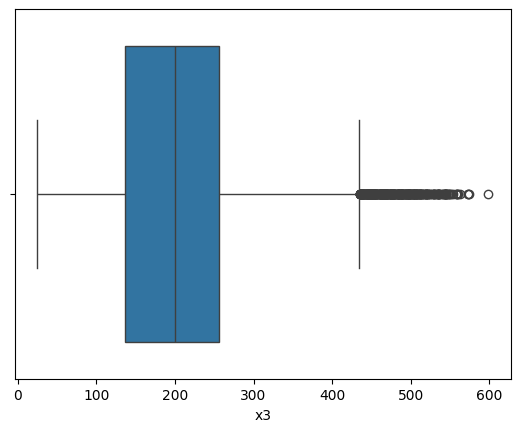

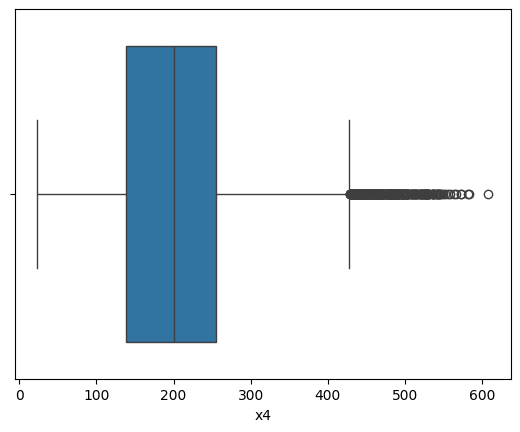

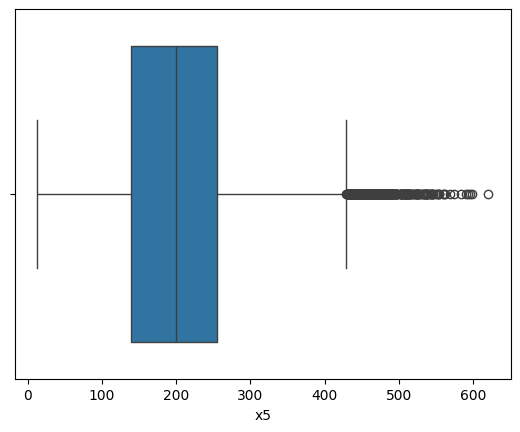

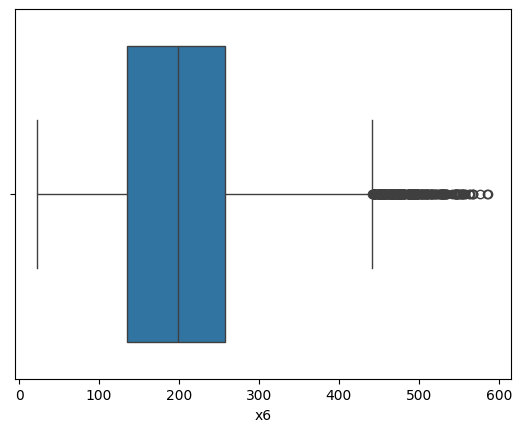

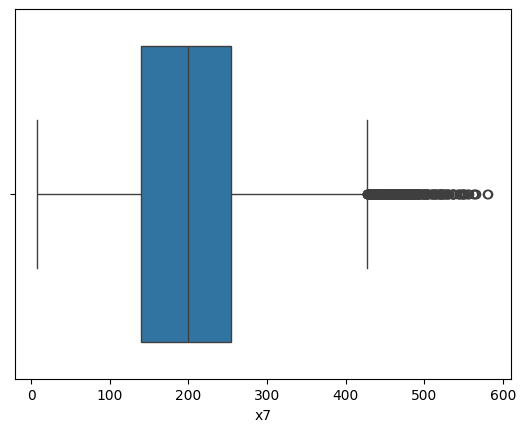

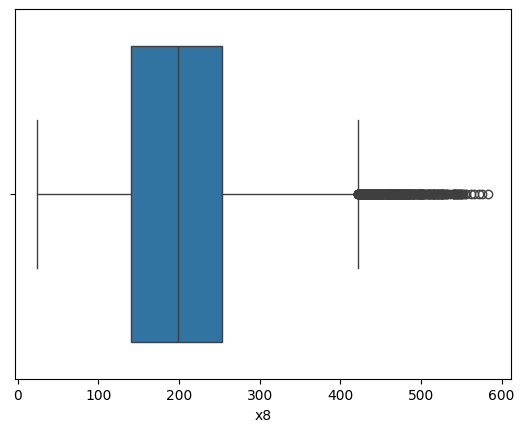

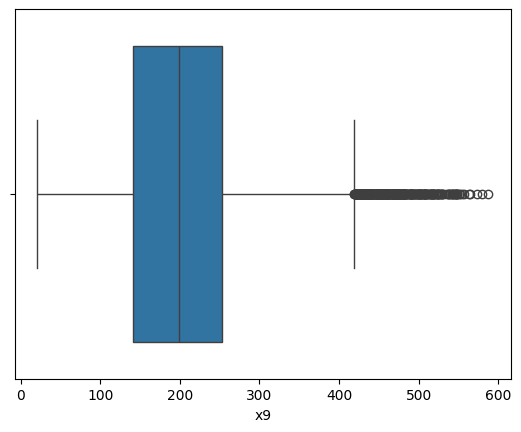

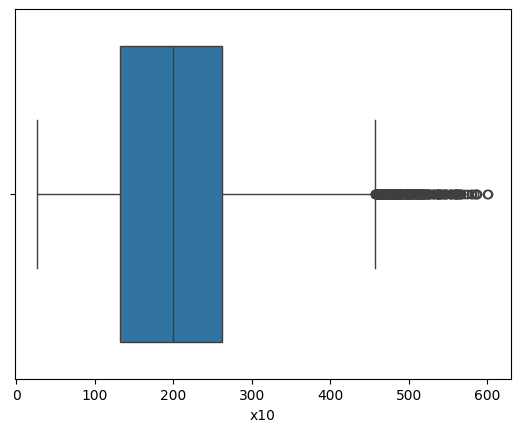

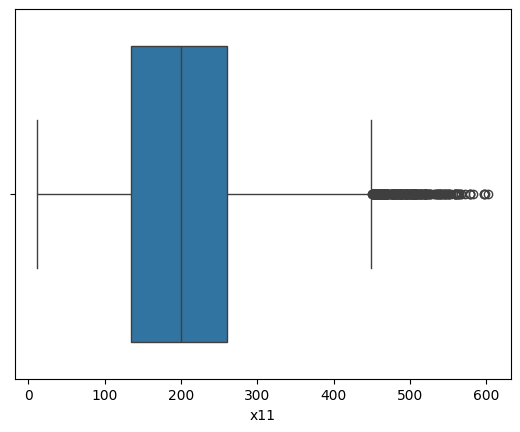

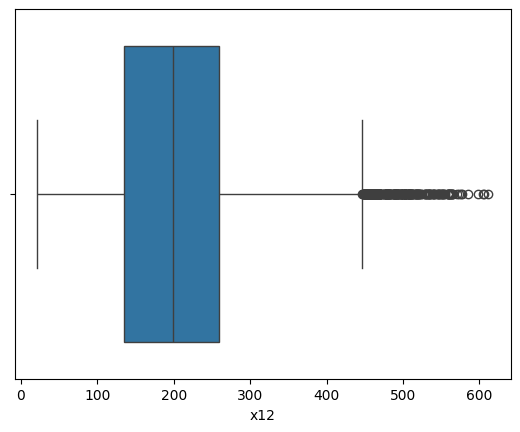

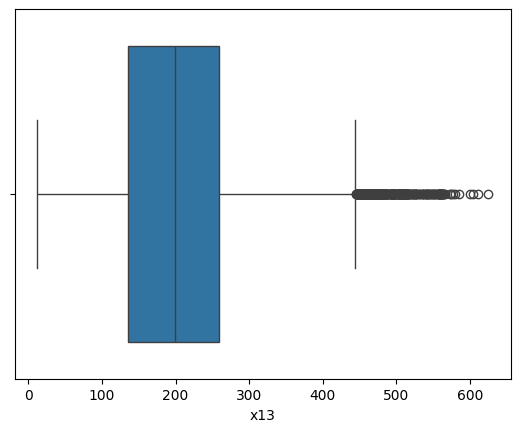

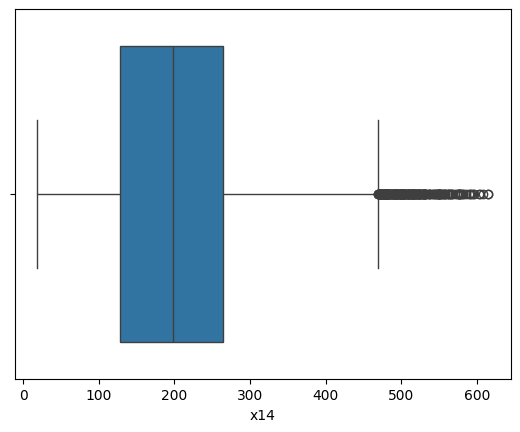

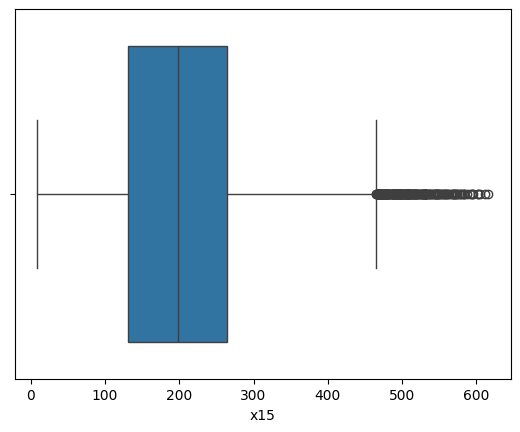

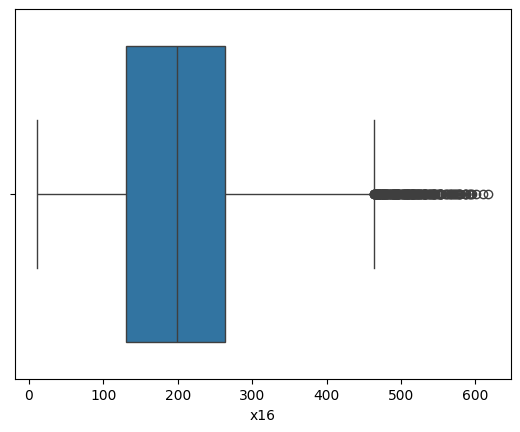

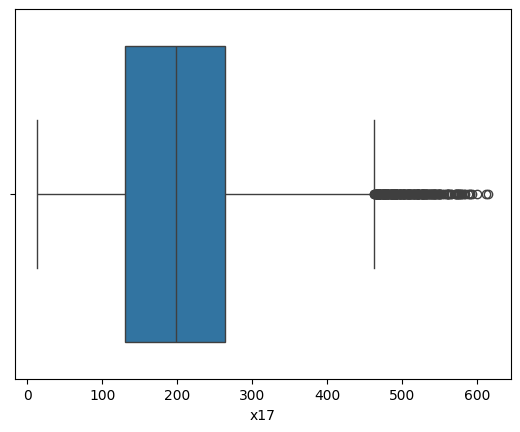

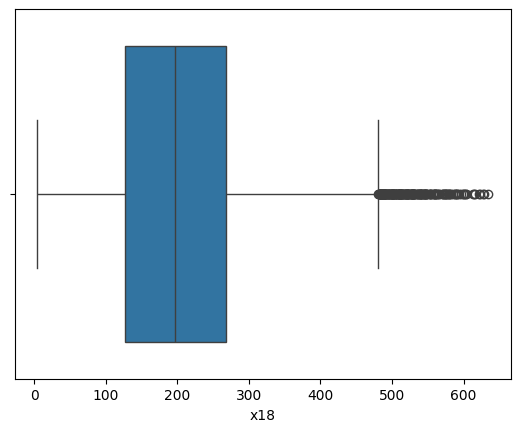

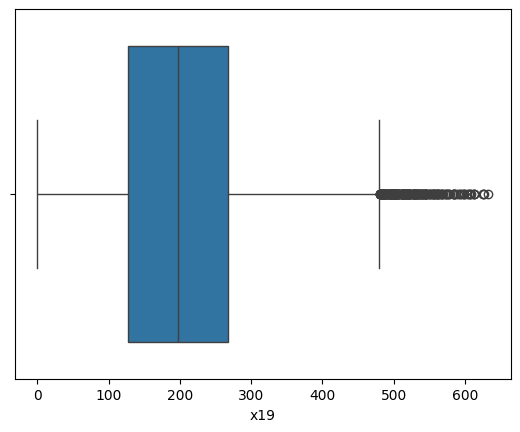

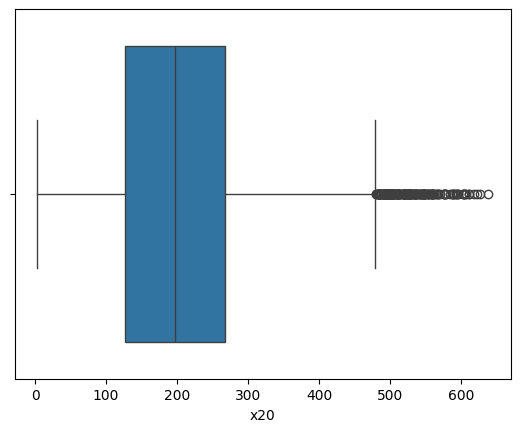

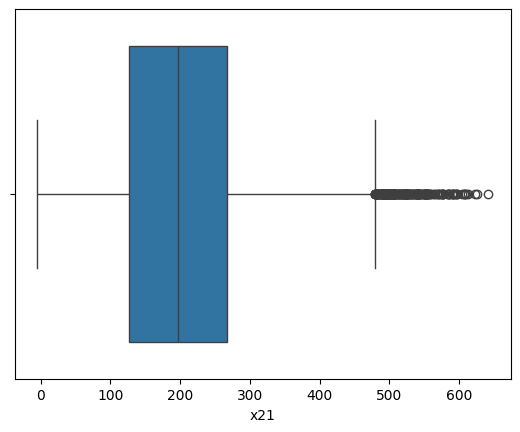

In [119]:
for i in range(1,22):
  sns.boxplot(data=df,x=f"x{str(i)}")
  plt.show()

#### from boxplot there are outliers

In [11]:
x_cols=[]
y_cols=[]
z_cols=[]
for i in range(1,22):
    x_cols.append(f"x{str(i)}")
    y_cols.append(f"y{str(i)}")
    z_cols.append(f"z{str(i)}")

# Data Preprocessing

#### cut data into labels and features and recenter x,y values on x1,y1(whrist)

In [38]:
labels=df[["label"]]
features = df.iloc[:, :-1]
features=features.drop(columns=z_cols,axis=1)
features[x_cols[1:]] = features[x_cols[1:]].sub(features[x_cols[0]], axis=0)
features[y_cols[1:]] = features[y_cols[1:]].sub(features[y_cols[0]], axis=0)
features

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21
0,262.669968,257.304901,-5.252426,-10.195847,-15.787010,-15.588074,-26.285431,-15.850983,-32.593300,-13.357376,...,-31.915558,10.764618,-26.157440,-5.598724,-39.324875,-1.814209,-47.626602,0.809845,-54.663574,2.303772
1,83.351778,346.059113,-1.426741,-17.496765,6.728354,-34.523865,12.290045,-47.198486,11.118582,-58.760345,...,35.209608,-9.411163,32.893301,-4.111328,49.099840,-4.264679,59.421804,-3.229858,69.079920,-3.043121
2,187.756977,260.235492,7.703602,-18.729457,19.502552,-36.561153,27.656651,-51.200132,27.015896,-63.625904,...,45.268490,4.269981,42.343197,5.348683,62.544033,8.367446,74.668156,11.041146,85.232975,12.036739
3,114.976696,331.594238,-0.473202,-11.044281,1.659931,-21.513245,2.708370,-29.720123,1.789913,-36.616425,...,22.066864,-7.186432,20.509140,-2.544128,30.218754,-2.236694,36.076504,-1.881897,41.013668,-2.045410
4,188.795288,141.727867,-0.274384,-13.780403,3.187592,-30.717304,3.757233,-43.040176,-0.555725,-51.333578,...,25.275940,-10.225239,24.310532,-6.434658,37.901108,-9.464619,46.036453,-11.043720,52.792480,-13.250679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25670,259.135620,277.542236,11.962601,-20.208862,10.214630,-40.003891,-1.801117,-49.559860,-13.758614,-52.055466,...,-16.362854,-45.330048,-28.010513,-36.696228,-28.033470,-47.233887,-24.118378,-42.512924,-21.526909,-36.623825
25671,90.063995,256.181732,-12.761765,-18.352600,-11.405107,-35.710052,-0.689833,-44.794556,8.527554,-46.572403,...,12.212368,-41.956894,25.748417,-32.909576,26.628330,-45.249725,22.617989,-40.907379,20.114353,-34.843353
25672,236.724518,251.496756,18.193840,-19.126800,19.277985,-41.527650,10.350929,-58.093909,0.669067,-67.503245,...,-10.511650,-47.692892,-27.626244,-45.956711,-24.790741,-49.106781,-21.231125,-42.543484,-18.666870,-36.259837
25673,119.466957,309.842529,-7.694893,-18.532196,-2.571510,-36.158600,9.772831,-44.434784,20.629360,-45.085358,...,26.283268,-37.984436,28.700684,-29.814026,37.750465,-38.785828,35.313148,-32.581390,30.650162,-27.831482


#### now we scale our data

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(features)

scaled_features = pd.DataFrame(scaler.transform(features),columns=features.columns)
scaled_features

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21
0,0.670854,-0.037287,-0.459326,-0.267732,-0.796673,0.251610,-1.105103,0.582377,-1.197383,0.779723,...,-1.746743,1.505496,-1.281989,1.192088,-1.528242,1.390584,-1.861658,1.325507,-2.125499,1.211592
1,-1.310594,1.122418,-0.156937,-1.175775,0.277978,-0.962419,0.453458,-0.863866,0.360275,-0.944487,...,1.895810,0.896229,1.638581,1.279946,1.922706,1.280266,2.335703,1.164056,2.693444,1.024656
2,-0.156927,0.001006,0.564739,-1.329090,0.887686,-1.093035,1.074314,-1.048486,0.926770,-1.129260,...,2.441656,1.309371,2.105960,1.838736,2.447392,1.848954,2.933511,1.734412,3.322492,1.551871
3,-0.961142,0.933413,-0.081568,-0.373255,0.036064,-0.128270,0.066331,-0.057487,0.027851,-0.103556,...,1.182618,0.963411,1.026077,1.372519,1.185835,1.371564,1.420335,1.217929,1.600460,1.059538
4,-0.145454,-1.547472,-0.065853,-0.713557,0.108978,-0.718369,0.108708,-0.672019,-0.055735,-0.662450,...,1.356759,0.871645,1.214089,1.142711,1.485654,1.046169,1.810864,0.851767,2.059162,0.667785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25670,0.631800,0.227144,0.901377,-1.513089,0.444377,-1.313759,-0.115866,-0.972810,-0.526215,-0.689864,...,-0.902774,-0.188449,-1.373639,-0.644797,-1.087573,-0.654171,-0.939902,-0.405935,-0.835058,-0.149376
25671,-1.236424,-0.051963,-1.052875,-1.282219,-0.587526,-1.038469,-0.070966,-0.752959,0.267944,-0.481641,...,0.647863,-0.086586,1.285205,-0.421125,1.045711,-0.564846,0.892628,-0.341767,0.786578,-0.087128
25672,0.384160,-0.113179,1.393904,-1.378509,0.876968,-1.411452,0.375113,-1.366536,-0.012090,-1.276504,...,-0.585258,-0.259802,-1.354634,-1.191801,-0.961019,-0.738488,-0.826693,-0.407156,-0.723679,-0.136650
25673,-0.911525,0.649195,-0.652382,-1.304556,-0.165902,-1.067227,0.351756,-0.736361,0.699188,-0.425170,...,1.411421,0.033374,1.431220,-0.238275,1.479775,-0.273847,1.390404,-0.009010,1.196874,0.158018


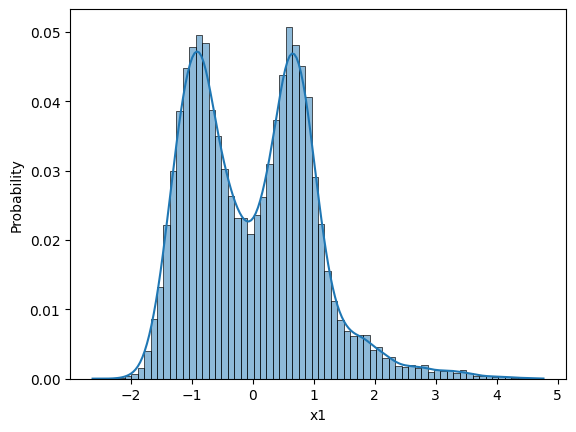

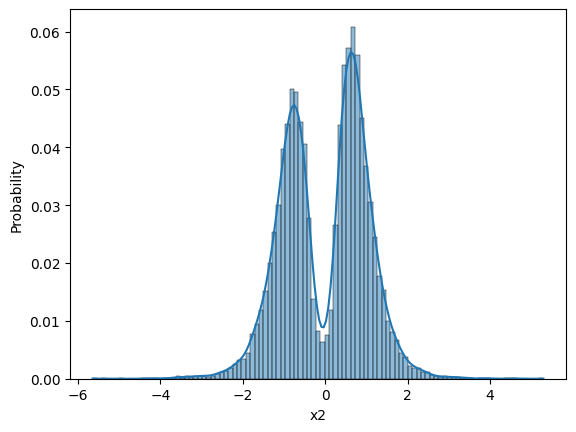

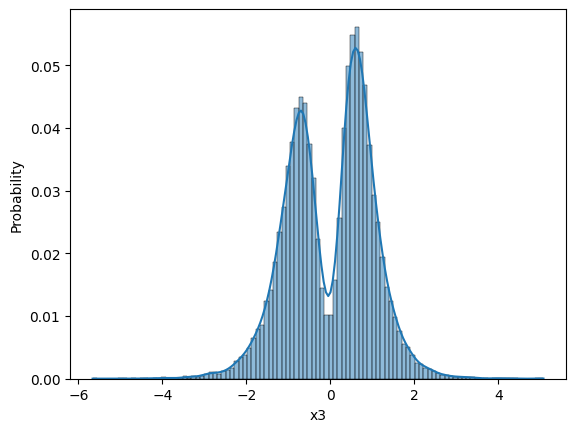

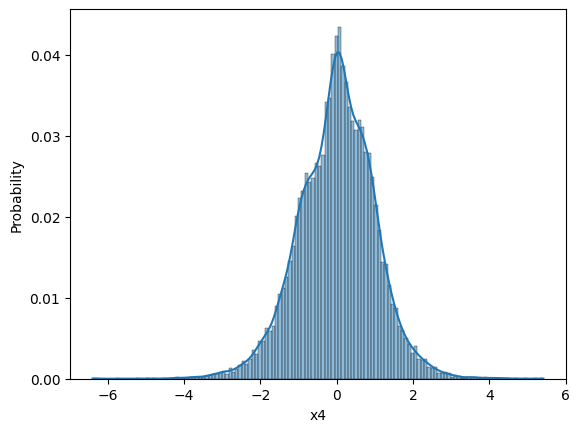

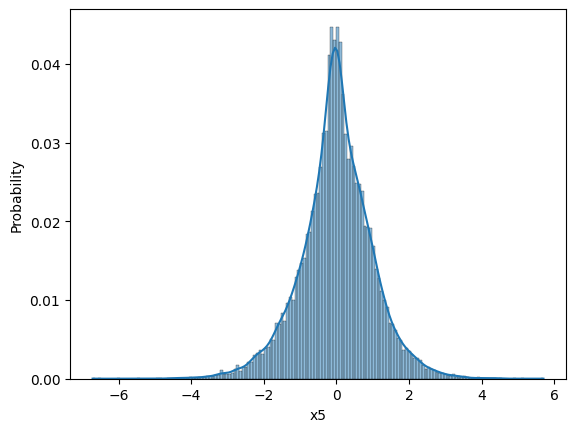

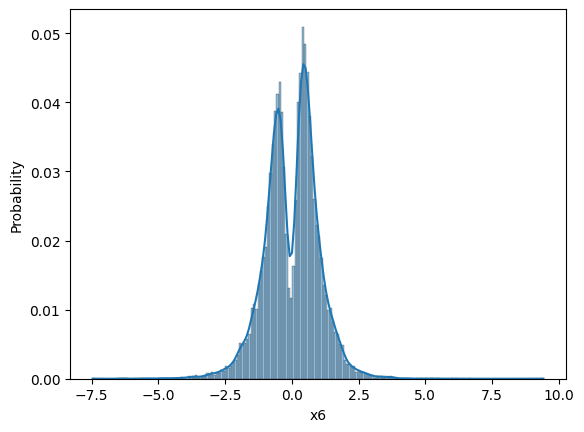

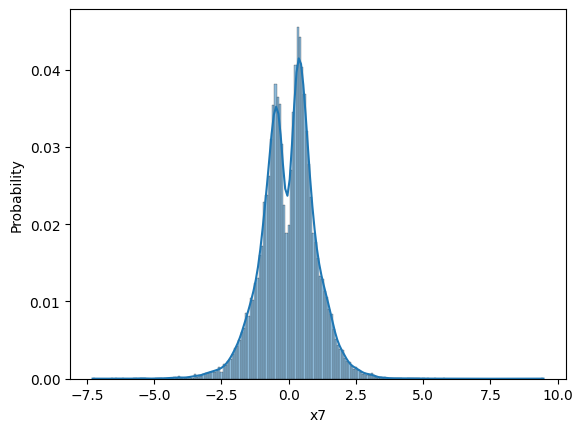

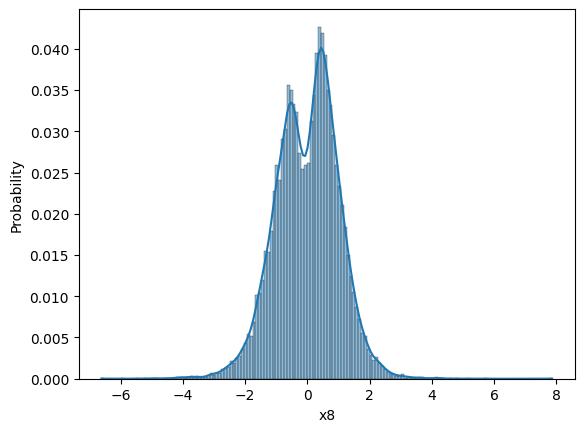

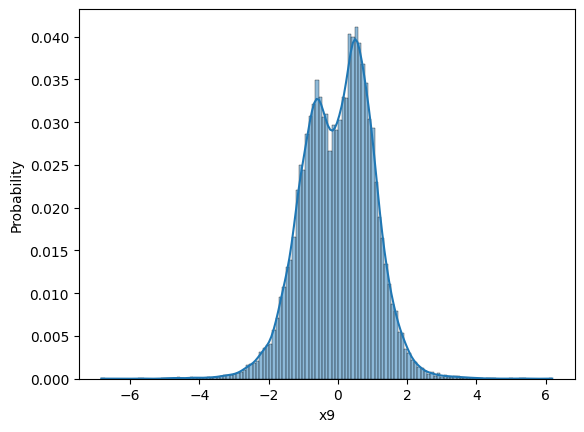

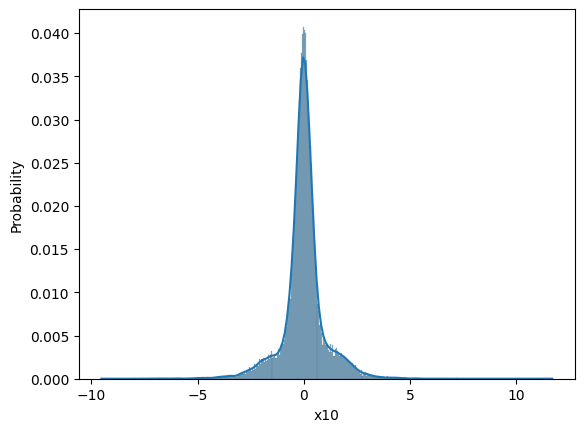

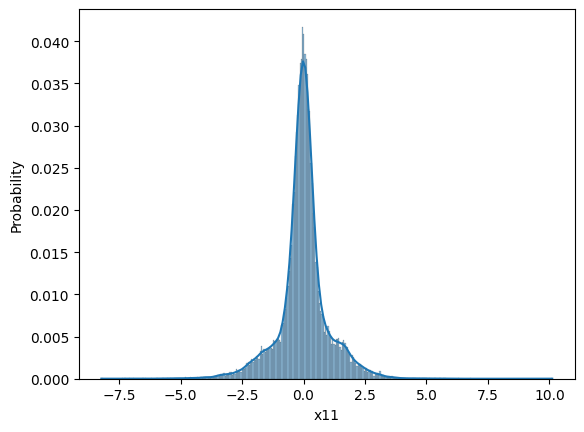

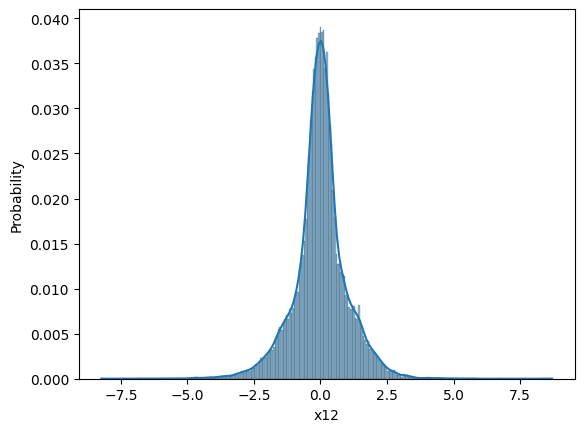

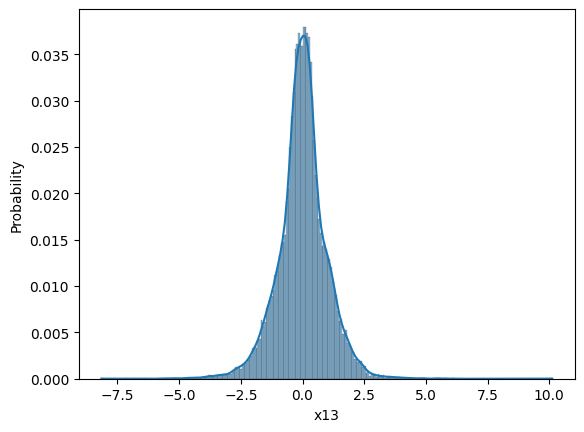

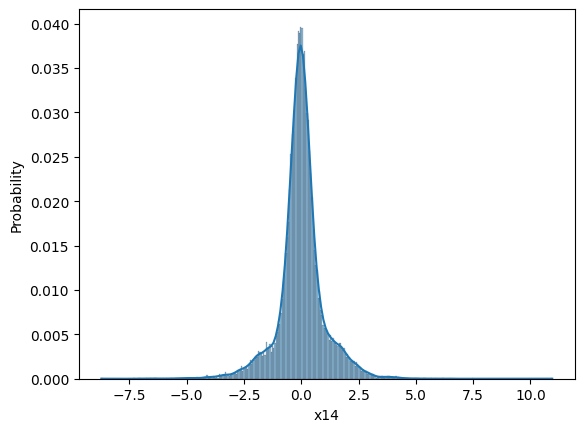

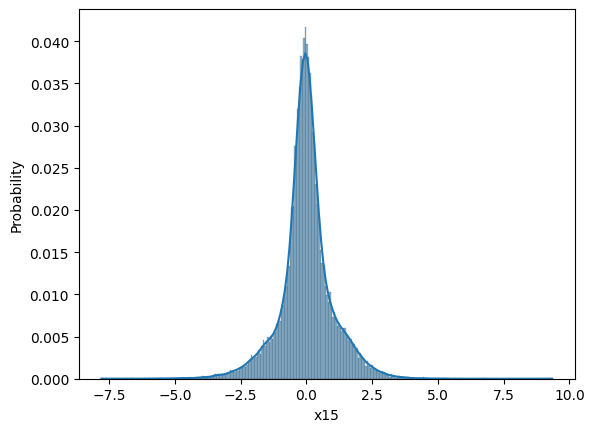

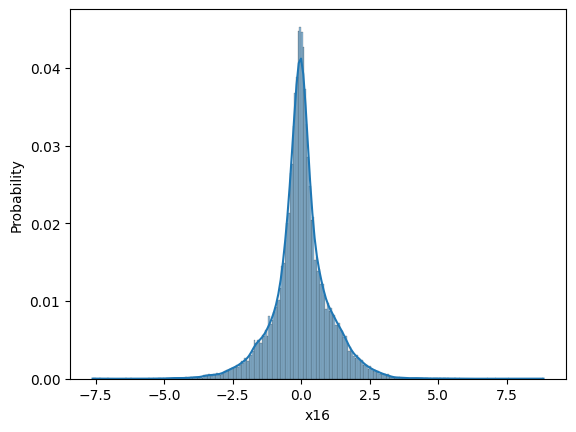

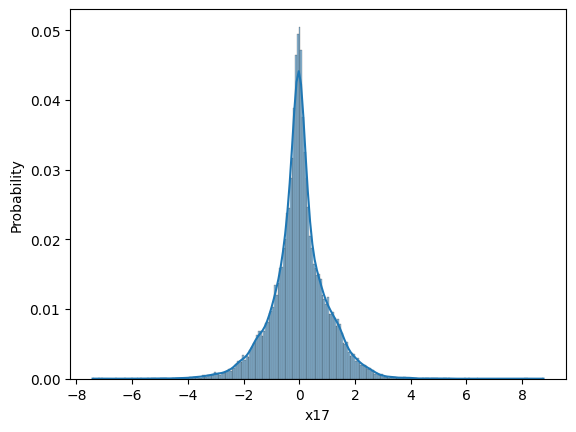

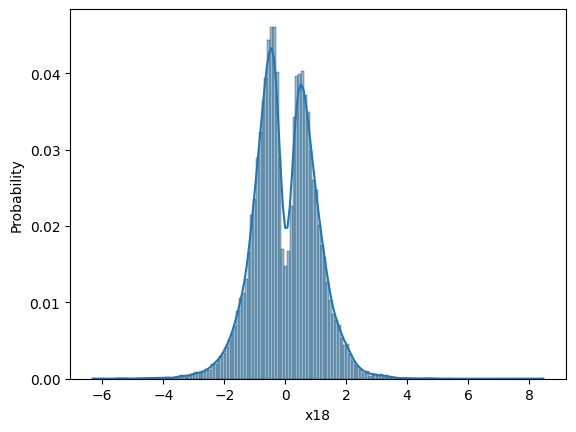

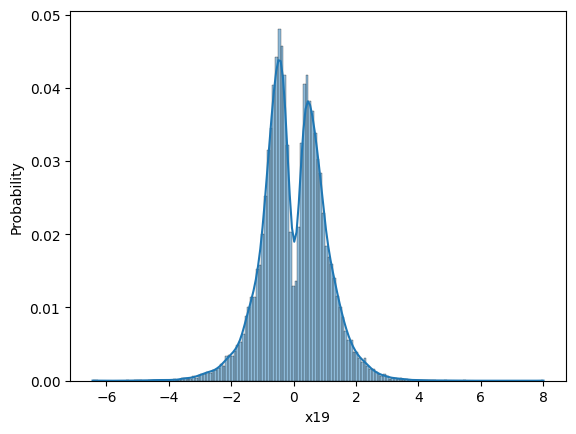

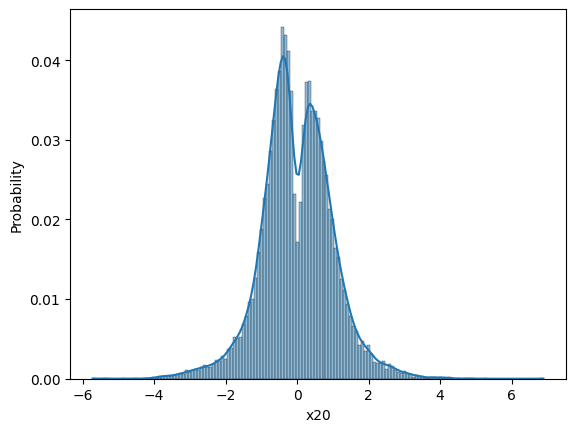

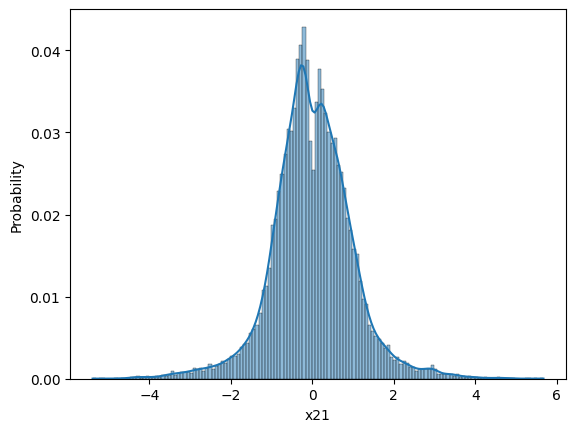

In [41]:
for i in range(1,22):
  sns.histplot(data=scaled_features,x=f"x{str(i)}",stat="probability",kde=True)
  plt.show()

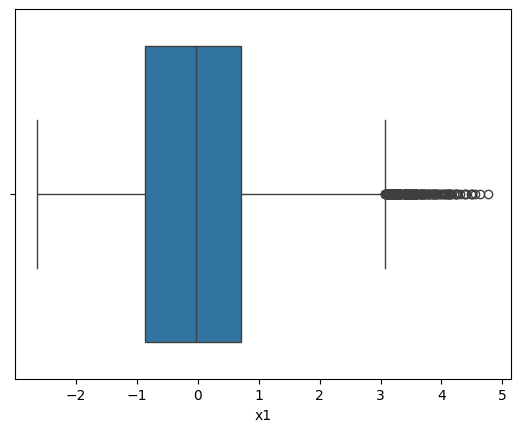

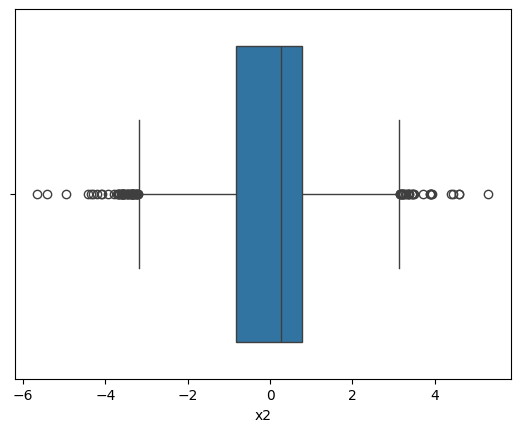

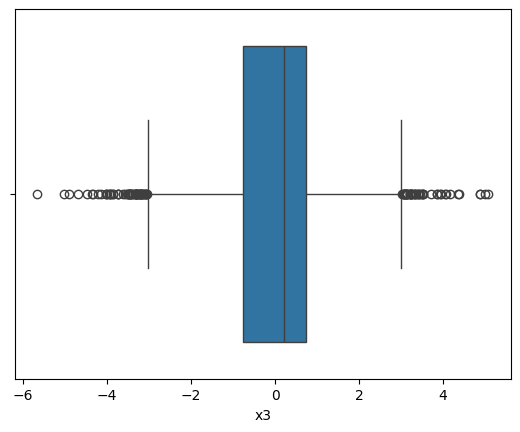

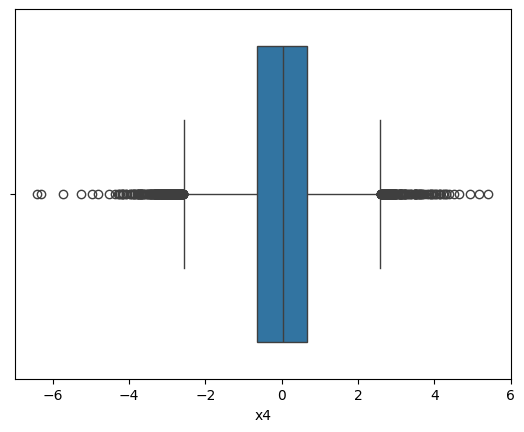

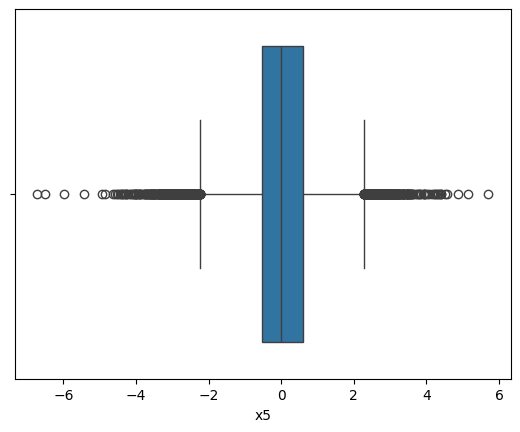

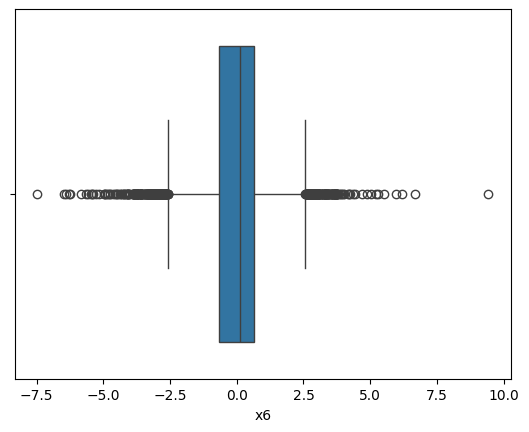

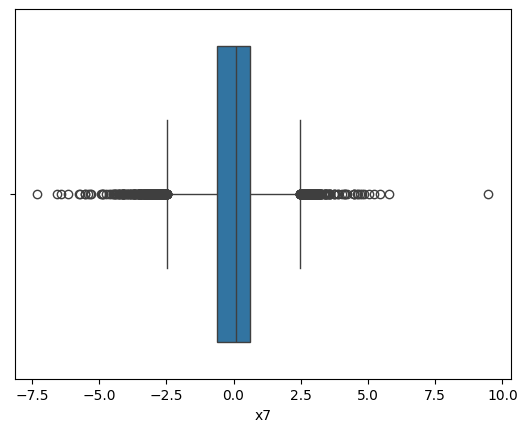

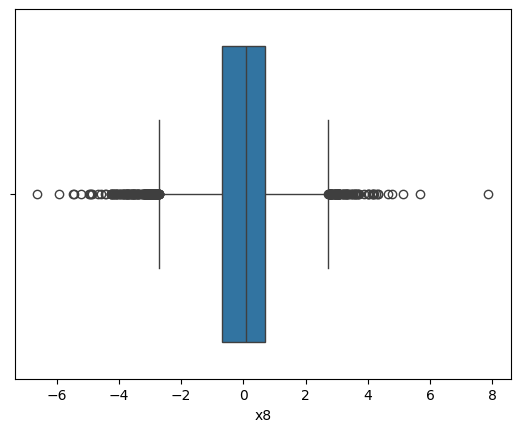

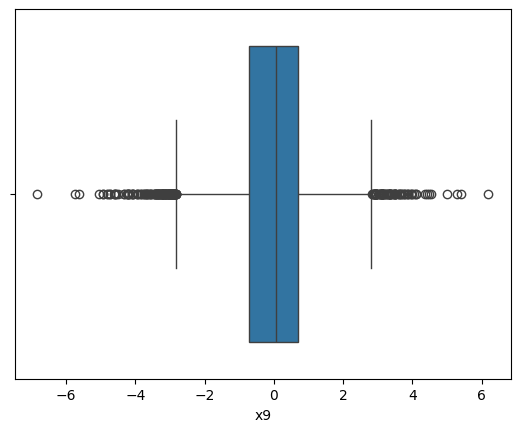

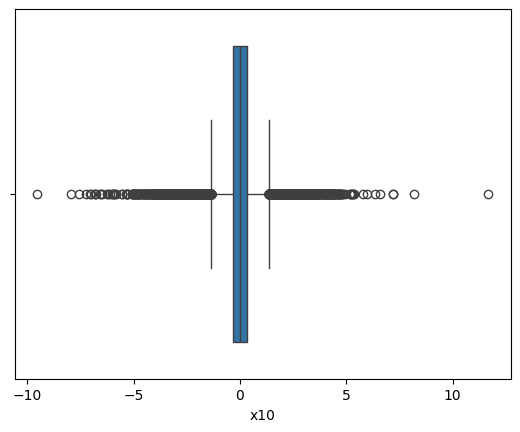

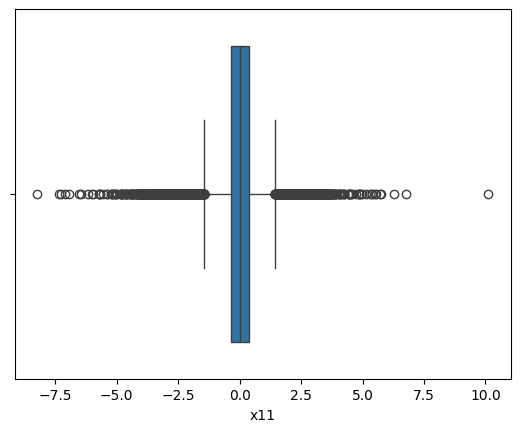

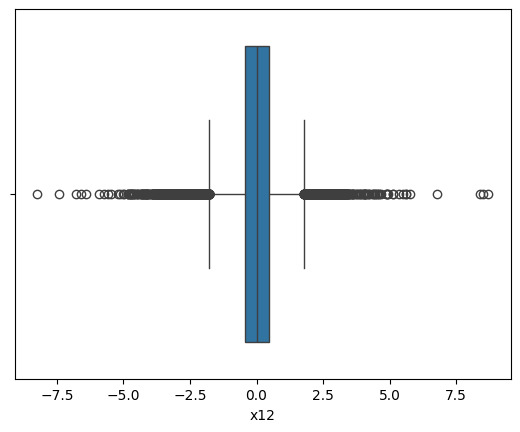

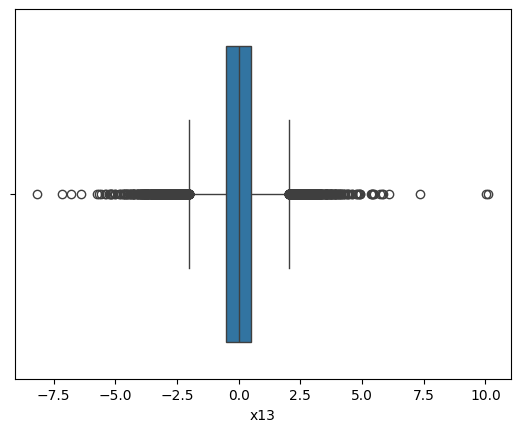

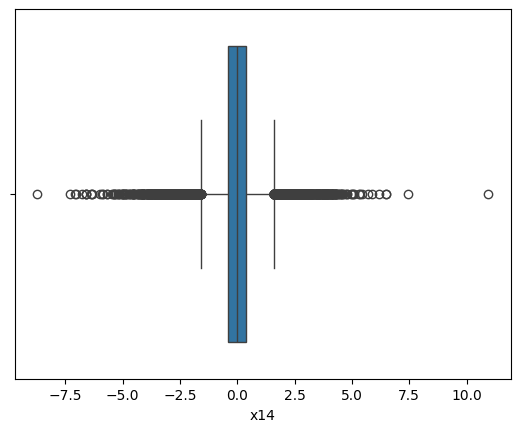

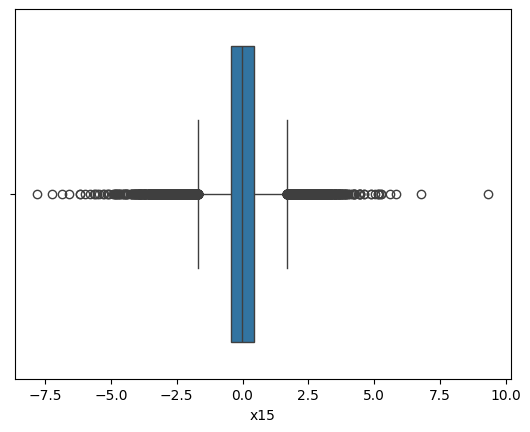

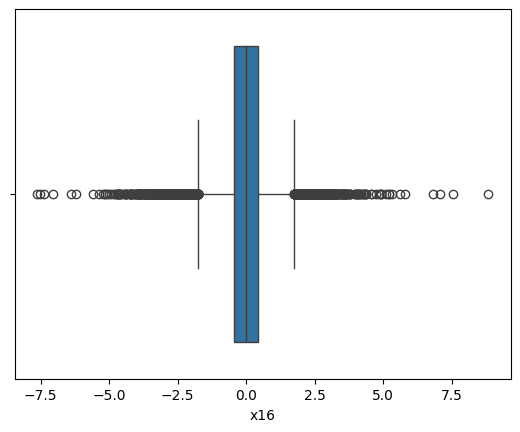

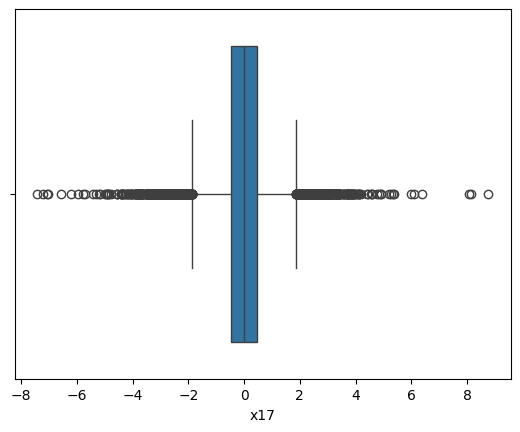

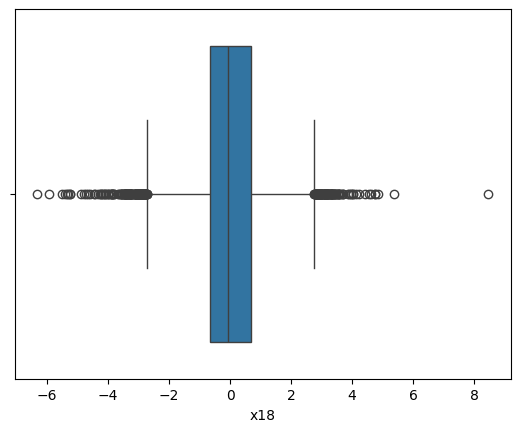

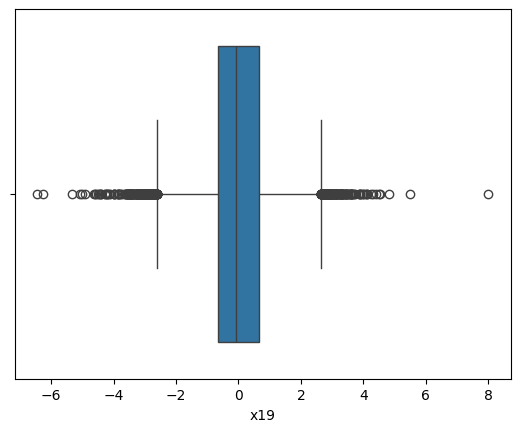

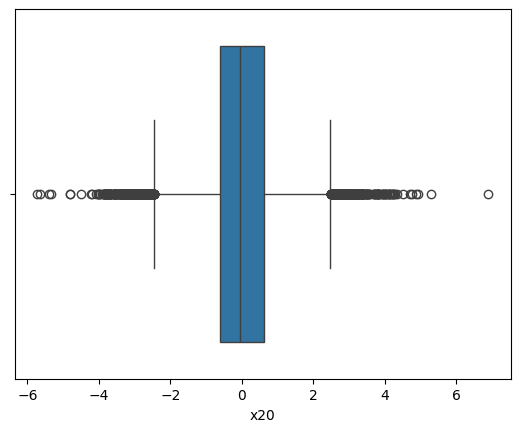

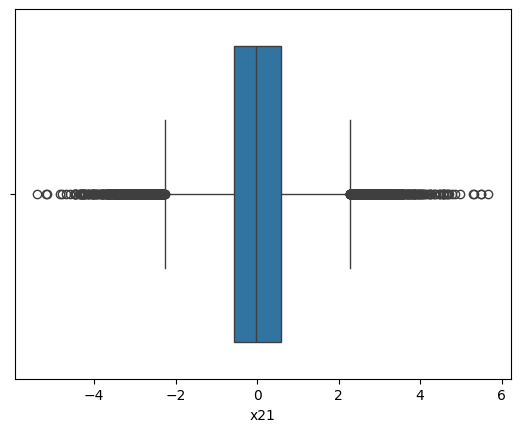

In [43]:
for i in range(1,22):
  sns.boxplot(data=scaled_features,x=f"x{str(i)}")
  plt.show()

#### now we remove the outliers

In [120]:
Q1 = scaled_features.quantile(0.25)
Q3 = scaled_features.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

features_no_outliers = scaled_features[~((scaled_features < lower_bound) | (scaled_features > upper_bound)).any(axis=1)]
labels_no_outliers = labels[~((scaled_features < lower_bound) | (scaled_features > upper_bound)).any(axis=1)]

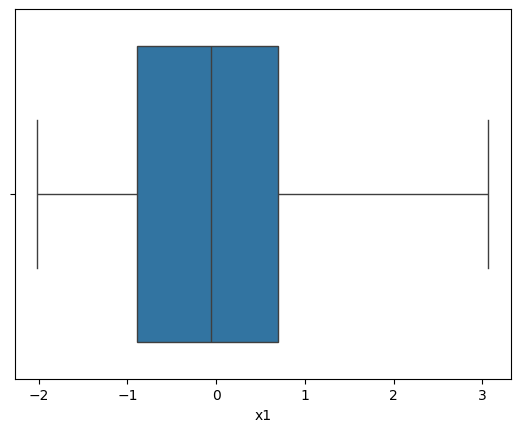

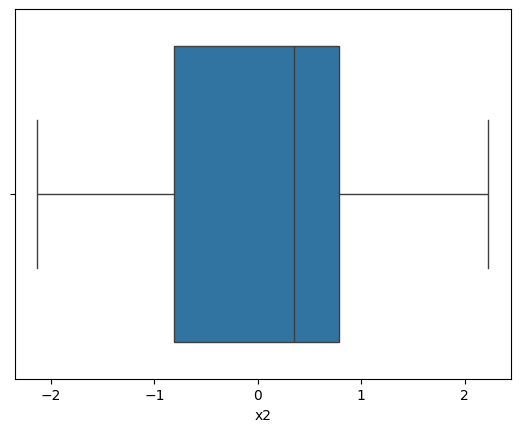

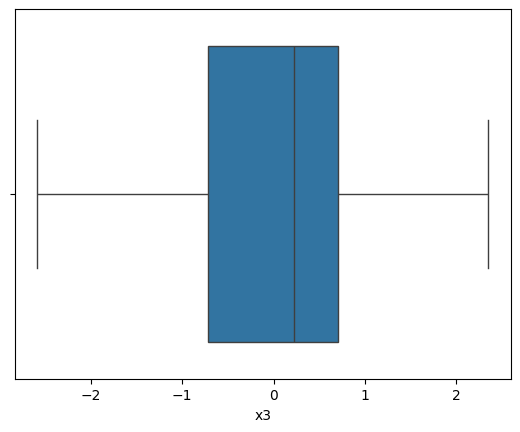

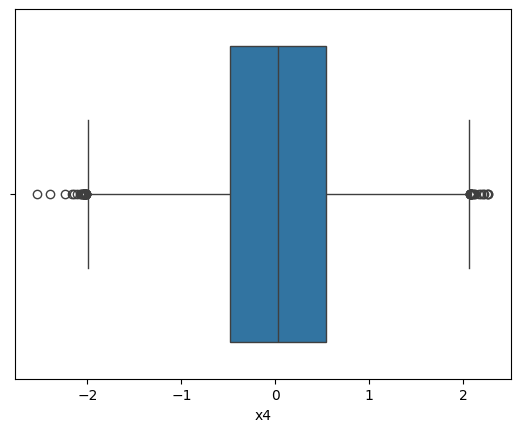

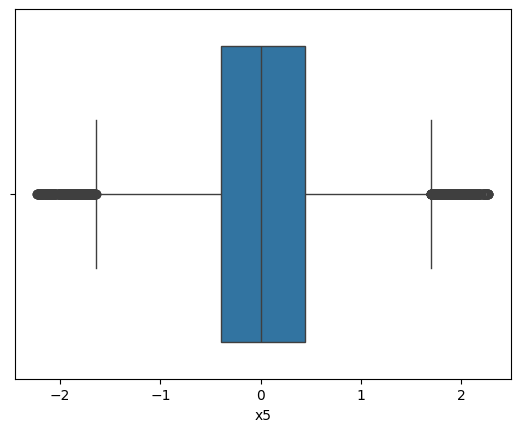

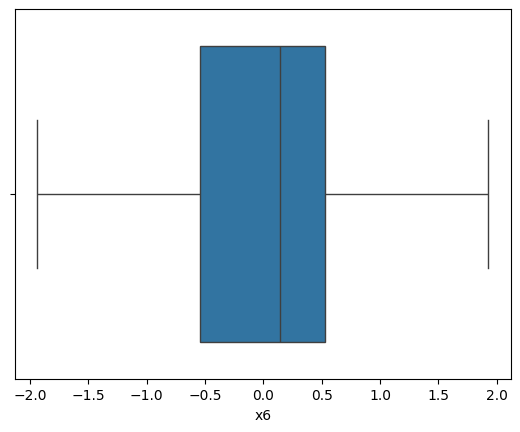

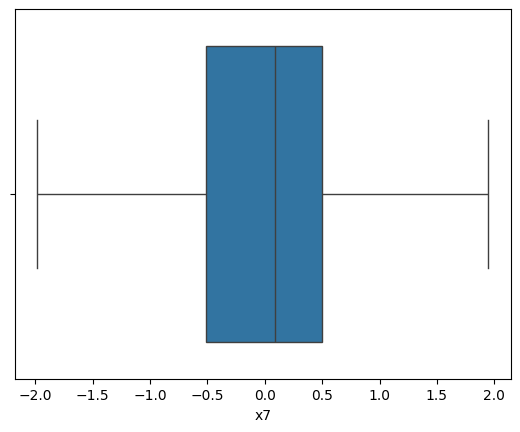

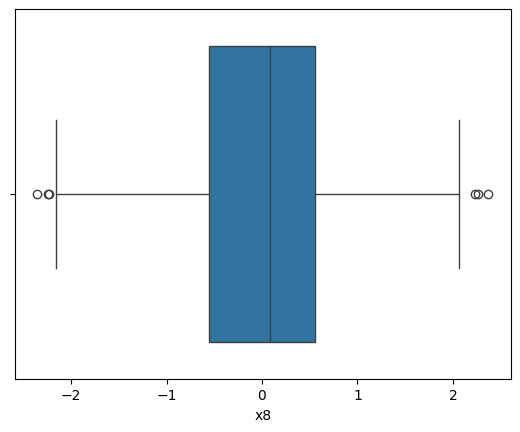

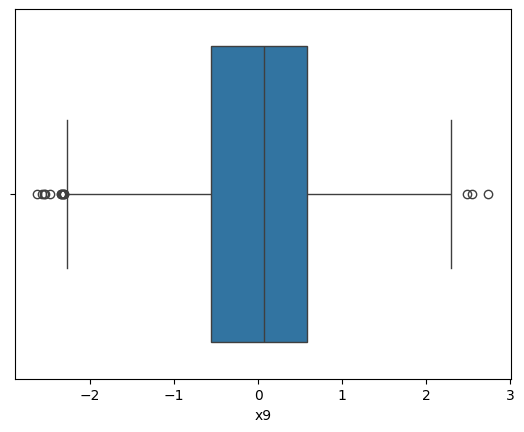

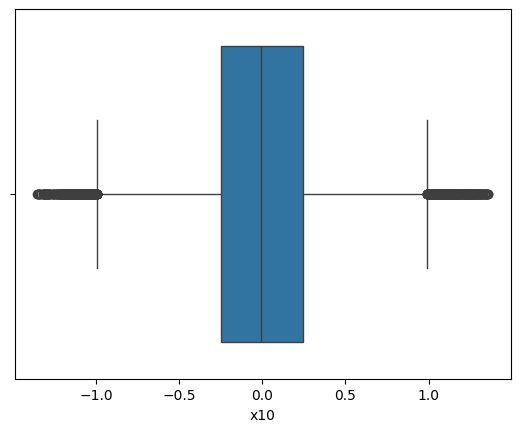

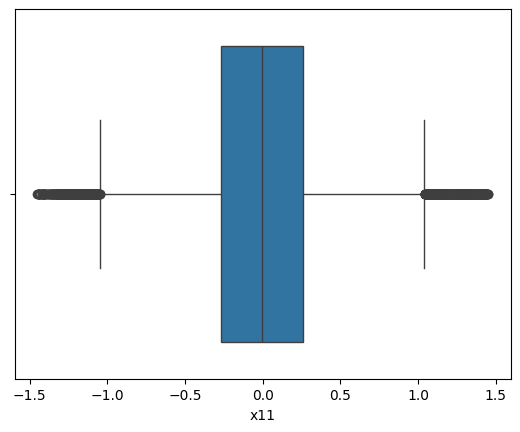

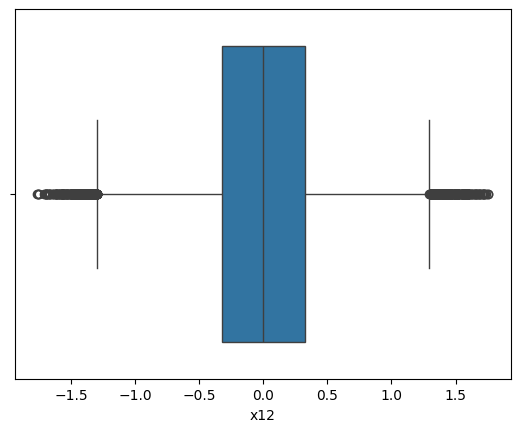

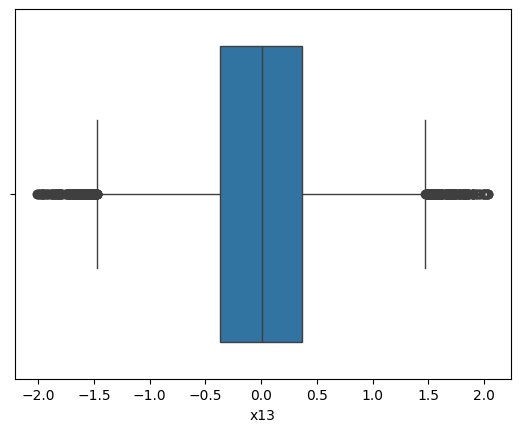

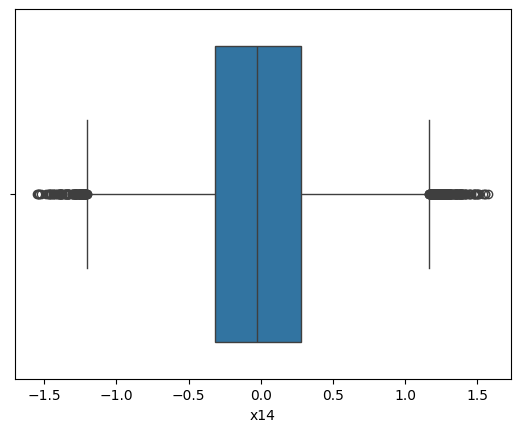

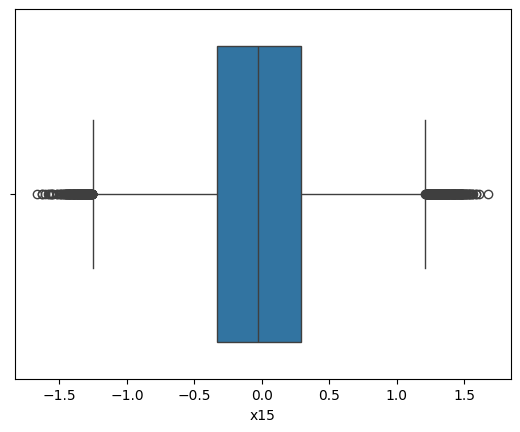

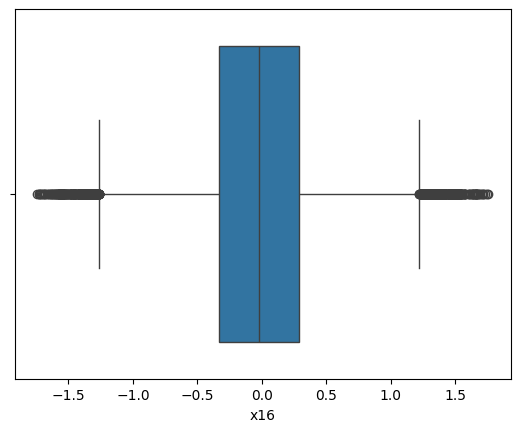

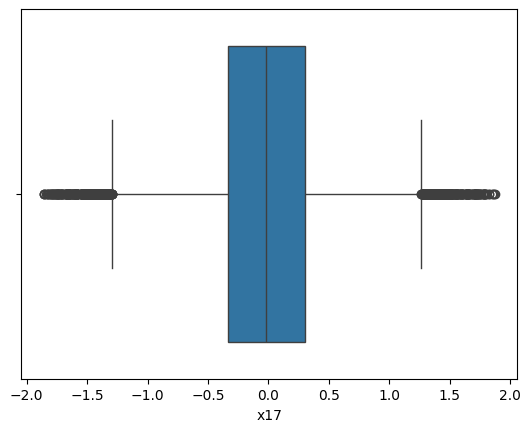

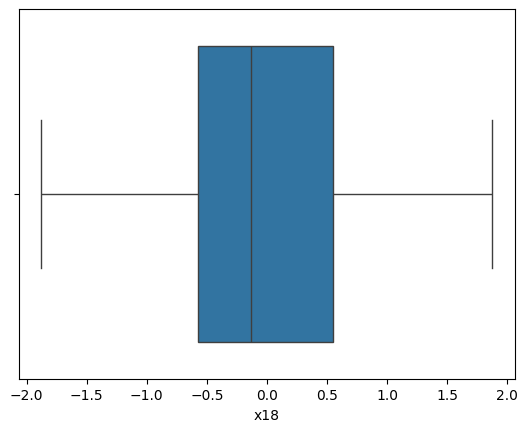

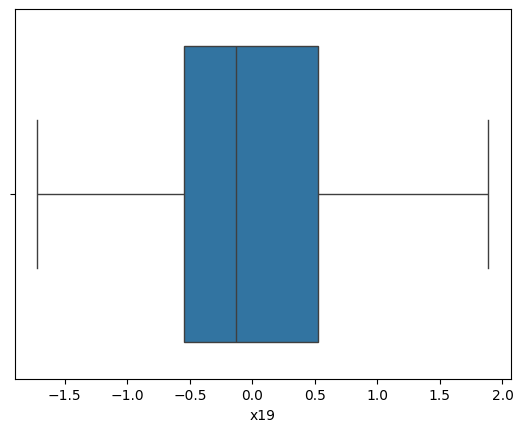

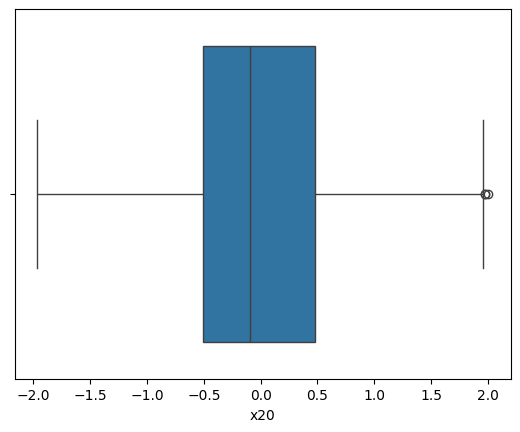

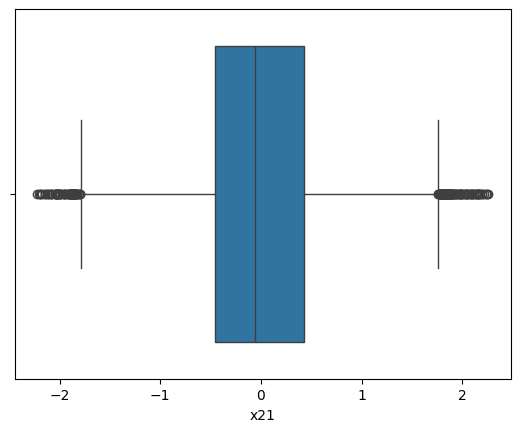

In [121]:
for i in range(1,22):
  sns.boxplot(data=features_no_outliers,x=f"x{str(i)}")
  plt.show()

#### splitting data into train and test

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_no_outliers,labels_no_outliers,test_size=0.2)

# SVM

In [124]:
from sklearn.svm import SVC

# use SVM rbf with gamma = 0.05
svm_gamma_005 =SVC(kernel='rbf',gamma=0.05)
svm_gamma_005.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.05)

In [125]:
print("Gamma = 0.05")
print("Accuracy:", svm_gamma_005.score(X_test, y_test))

Gamma = 0.05
Accuracy: 0.9687251523986218


# Random Forest

In [141]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(n_estimators=50,max_depth=30)
random_forest_classifier.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=30, n_estimators=50)

In [142]:
random_forest_classifier.score(X_test, y_test)

0.9613040021203286

# Logistic Regression

In [145]:
from sklearn.linear_model import SGDClassifier
clf= SGDClassifier(loss='log_loss',tol=None)
clf.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(loss='log_loss', tol=None)

In [146]:
clf.score(X_test, y_test)

0.8226875165650676

# Saving Models

In [147]:
import joblib

joblib.dump(svm_gamma_005, 'SVM_Hand_LandMark.pkl')
joblib.dump(random_forest_classifier, 'RF_Hand_LandMark.pkl')
joblib.dump(clf, 'LR_Hand_LandMark.pkl')


['LR_Hand_LandMark.pkl']

#### Realtime classifying

In [149]:
import cv2
import joblib
import numpy as np
from sklearn.pipeline import Pipeline

# Load your trained model (example assumes a scikit-learn model)
model = joblib.load('SVM_Hand_LandMark.pkl')

pipeline = Pipeline([
    ('scaler', scaler),
    ('classifier', model)
])

# Function to preprocess the frame (customize based on your model's requirements)
def preprocess_frame(frame):
    # Example: Resize the frame to 64x64 and flatten it
    processed_frame = cv2.resize(frame, (64, 64))
    processed_frame = processed_frame.flatten().reshape(1, -1)
    return processed_frame

# Open the camera (0 for the default camera)
cap = cv2.VideoCapture(0)

# Check if the camera is opened successfully
if not cap.isOpened():
    print("Error: Could not open video stream or file")
else:
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        # If frame is read correctly, ret is True
        if not ret:
            print("Error: Can't receive frame (stream end?). Exiting ...")
            break

        # Preprocess the frame
        preprocessed_frame = preprocess_frame(frame)

        # Make a prediction
        prediction = pipeline.predict(preprocessed_frame)

        # Display the results (example: display the prediction on the frame)
        cv2.putText(frame, str(prediction[0]), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

        # Display the resulting frame
        cv2.imshow('Real-time Prediction', frame)

        # Press 'q' to exit the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # When everything done, release the capture
    cap.release()
    cv2.destroyAllWindows()


Error: Could not open video stream or file
